In [ ]:
 from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


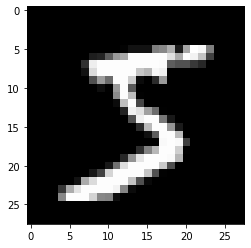

In [ ]:
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

In [ ]:
from keras.layers import Dropout
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(400,activation ='relu'))
model.add(keras.layers.Dense(10,activation ='softmax'))

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 8.6012 - accuracy: 0.8621 - val_loss: 0.4119 - val_accuracy: 0.9288
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3254 - accuracy: 0.9357 - val_loss: 0.3630 - val_accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2631 - accuracy: 0.9418 - val_loss: 0.3776 - val_accuracy: 0.9312
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2709 - accuracy: 0.9441 - val_loss: 0.3929 - val_accuracy: 0.9326
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2044 - accuracy: 0.9559 - val_loss: 0.3730 - val_accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2264 - accuracy: 0.9524 - val_loss: 0.2933 - val_accuracy: 0.9450
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2000 - accuracy: 0.9594 - val_loss: 0.3085 - val_accuracy:

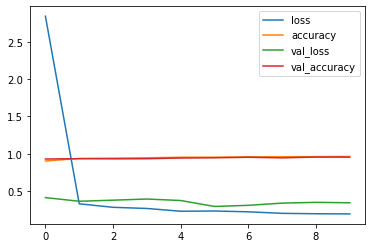

In [ ]:

loss = pd.DataFrame(model.history.history)
loss.plot()


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:

y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)*100


95.37

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       963
           1       0.98      0.99      0.98      1131
           2       0.94      0.97      0.96      1001
           3       0.93      0.95      0.94       991
           4       0.96      0.96      0.96       988
           5       0.93      0.96      0.95       860
           6       0.98      0.96      0.97       983
           7       0.96      0.96      0.96      1022
           8       0.95      0.86      0.90      1077
           9       0.93      0.95      0.94       984

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
model.save('Digit_Recognizer.hdf5')